**Medical Appointment No Shows**

Load dataset

In [10]:
'''importing packages required'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [11]:
'''Load dataset'''
df = pd.read_csv("Appointments.csv")

In [12]:
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Identify missing values

In [13]:
# Calculate
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values

Series([], dtype: int64)

Visualize missing data patterns using simple bar chart

IndexError: index 0 is out of bounds for axis 0 with size 0

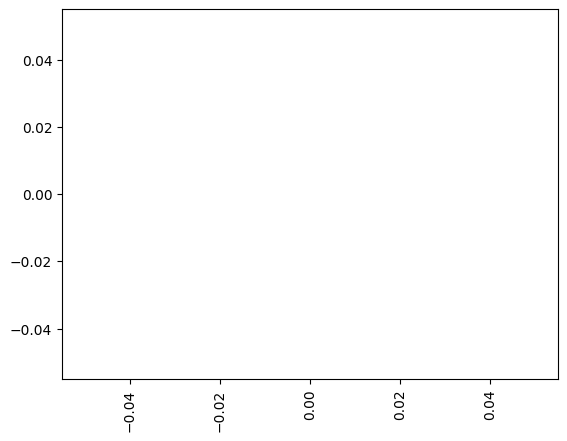

In [14]:
# Plot bar chart
plt.figure()
missing_values.plot(kind='bar')
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.title("Missing Data Pattern in Medical Appointment No Shows Dataset")
plt.show()

Applying mean/median imputation for numerical columns

In [15]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

In [16]:
# Apply median imputation (robust to outliers)
df[numerical_columns] = df[numerical_columns].fillna(
    df[numerical_columns].median()
)

In [17]:
# Verify missing values
df[numerical_columns].isnull().sum()

PatientId        0
AppointmentID    0
Age              0
Scholarship      0
Hipertension     0
Diabetes         0
Alcoholism       0
Handcap          0
SMS_received     0
dtype: int64

Applying mode imputation for categorical columns

In [18]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

In [19]:
# Apply mode imputation
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

In [20]:
# Verify missing values
df[categorical_columns].isnull().sum()

Gender            0
ScheduledDay      0
AppointmentDay    0
Neighbourhood     0
No-show           0
dtype: int64

Removing columns with extremely high missing values

In [21]:
# Calculate percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100

In [22]:
# Set threshold (e.g., 60%)
threshold = 60

In [23]:
# Identify columns to drop
columns_to_drop = missing_percentage[missing_percentage > threshold].index

In [24]:
# Drop those columns
df = df.drop(columns=columns_to_drop)

In [25]:
# Display dropped columns
print("Dropped Columns due to high missing values:")
print(columns_to_drop)


Dropped Columns due to high missing values:
Index([], dtype='object')


In [26]:
# Check dataset shape after dropping
print("\nDataset shape after dropping columns:", df.shape)


Dataset shape after dropping columns: (110527, 14)


Validating dataset after cleaning

In [27]:
# Check dataset shape after cleaning
print("Dataset Shape:", df.shape)

Dataset Shape: (110527, 14)


In [28]:
# Check remaining missing values
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())


Missing Values After Cleaning:
PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


In [29]:
# Check data types
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Comparing before vs after dataset size and quality

In [31]:
# Dataset size before cleaning
original_df = pd.read_csv("Appointments.csv")
print("Before Cleaning:", original_df.shape)

Before Cleaning: (110527, 14)


In [32]:
# Dataset size after cleaning
print("After Cleaning:", df.shape)

After Cleaning: (110527, 14)


In [33]:
# Compare missing values
print("\nMissing Values Before Cleaning:")
print(original_df.isnull().sum())


Missing Values Before Cleaning:
PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


In [34]:
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())


Missing Values After Cleaning:
PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


Saving Cleaned dataset

In [36]:
df.to_csv("Cleaned-Data.csv", index=False)

print("Cleaned dataset saved as CleanedData.csv")

Cleaned dataset saved as CleanedData.csv
